<h1 style="text-align: center;"><img class="responsive" style="float: left;" src="https://is1-ssl.mzstatic.com/image/thumb/Purple112/v4/b5/6e/20/b56e2053-ccd2-d63f-e0fb-a1bf3774eb0b/AppIcon-0-0-1x_U007emarketing-0-0-0-10-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/230x0w.webp" alt="" width="143" height="143" /></h1>
<h1 style="text-align: center;"><img class="responsive" style="font-size: 14px; float: right;" src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="163" height="165" /></h1>
<h1 style="text-align: center;"><span style="color: #000080; font-family: arial, helvetica, sans-serif;"><strong style="font-size: 24pt;">LCL Challenge</strong></span></h1>
<p style="text-align: center;"><span style="font-size: 14pt;">Scoring Immobilier: Syst&egrave;me Expert BEST&nbsp;IMMO</span></p>
<p style="text-align: center;"><span style="font-size: 10pt; font-family: verdana, geneva, sans-serif;">Lucie Gabagnou,&nbsp;Ghiles Idris,&nbsp;Armand L'Huillier,&nbsp;Yanis Rehoune</span></p>

### Installation de l'environnement de travail

#### Installation des packages

In [42]:
from scripts.modelisation import prepare_data_for_ml,fitting_model,gridsearchcv_for_model,evaluation,get_coeff_for_model,verif_nb_colonnes
import sklearn
import pickle
from sklearn.model_selection import  train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
import xgboost  as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
import numpy as np
import shap

warnings.filterwarnings("ignore")


#### Importation des données

In [43]:
""" RAPPEL SUR LES VARIABLES SELECTIONNEES"""

col_selected=["g_quotite", "g_PCT_TEG_TAEG_CRI", "g_MOY_ANC_PROF_BRP", "g_MNT_TOT_ASSURANCE_CRI", "g_COUT_RACHAT_BRP", "g_BEST_APPORT_TX_BRP","TOP_NAT_FR_CRI","QUA_INT_MAX_BRP","QUA_INT_1_BRP",
        "IRPRO_USAGE_V12_MAX", "IRPAR_USAGE_V12_MAX","IND_PRIMO_ACCEDT_CRI","COD_TYPE_MARCHE_CRI","COD_SITU_LOGT_CRI", "COD_CPPOP_CRI","CODTYP_CRT_TRAVAIL_CRI" ]


In [44]:
""" ON IMPORTE LES CSV DES DIFFERENTS SAMPLES (PREPROCESSES)"""
x_base_train = pd.read_csv('data/output/x_train.csv').drop(columns="Unnamed: 0")
df_test = pd.read_csv('data/output/x_test.csv').drop(columns="Unnamed: 0")
x_oot = pd.read_csv('data/output/x_oot.csv') .drop(columns="Unnamed: 0")


In [45]:
""" CLEAN + ONE-HOT-ENCODING"""
x_base_train,y_base_train=prepare_data_for_ml(x_base_train,col_selected)
df_test,y_df_test=prepare_data_for_ml(df_test,col_selected)
x_oot,y_oot=prepare_data_for_ml(x_oot,col_selected)


In [46]:
""" VERIFICATION MEME FEATURES POUR ML"""
x_oot=verif_nb_colonnes(x_base_train,x_oot)
df_test=verif_nb_colonnes(x_base_train,df_test)


In [47]:

display(x_base_train.head(10))
print("Vérification du nombre de variables (35 colonnes):",x_base_train.shape)

,g_quotite_grp_2,g_quotite_grp_3,g_quotite_grp_4,g_PCT_TEG_TAEG_CRI_grp_2,g_PCT_TEG_TAEG_CRI_grp_3,g_PCT_TEG_TAEG_CRI_grp_4,g_MOY_ANC_PROF_BRP_grp_2,g_MOY_ANC_PROF_BRP_grp_3,g_MOY_ANC_PROF_BRP_nan,g_MNT_TOT_ASSURANCE_CRI_grp_2,...,IRPAR_USAGE_V12_MAX_1,IRPAR_USAGE_V12_MAX_2,IND_PRIMO_ACCEDT_CRI_1,COD_TYPE_MARCHE_CRI_1,COD_SITU_LOGT_CRI_2,COD_SITU_LOGT_CRI_3,COD_CPPOP_CRI_1,COD_CPPOP_CRI_2,CODTYP_CRT_TRAVAIL_CRI_1,CODTYP_CRT_TRAVAIL_CRI_2
0,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
6,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
8,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
9,0,1,0,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0


Vérification du nombre de variables (35 colonnes): (68216, 35)


In [48]:
""" SPLIT TRAIN/TEST AVEC STRATIFICATION PAR RAPPORT A Y """
x_train, x_test, y_train, y_test=train_test_split(x_base_train,y_base_train,stratify=y_base_train,random_state=42)

### Régression logistique

#### Entraînement et performance sur l'échantillon train/validation

In [49]:
""" GRIDSEARCH POUR LOGISTIQUE"""

logistic_model=LogisticRegression()
grid_logistic = {'penalty' : ['elasticnet' ] ,
'C' : [0.01, 0.1 , 10] ,
'solver' :  ['saga'], 
'l1_ratio' : [ 0.01 , 0.1],
'class_weight' : [ {1 : class_} for class_ in [1,2,5]  ] }


params=gridsearchcv_for_model(logistic_model,x_train,y_train,grid_logistic,train_mod_with_best_params=False)
print("Best parameters:",params)


KeyboardInterrupt: 

In [51]:
""" PARAMETRES FINALEMENT RETENUS:"""
params_for_logistic={'random_state':42 ,
'fit_intercept':True, 
'class_weight':'{1: 2}', 
'C':0.1,
'l1_ratio':0, 
'penalty':'l2', 
'solver':'lbfgs'}


In [52]:
"""FITTING DU MODELE FINALE DE REGRESSION LOGISTIQUE""" 
logistic_final=LogisticRegression(**params_for_logistic)
logistic_final=fitting_model(logistic_final,x_train,y_train)

array([[50833,     0],
       [  329,     0]])

array([[16944,     0],
       [  110,     0]])

AUC TRAIN : 0.75
AUC TEST : 0.72


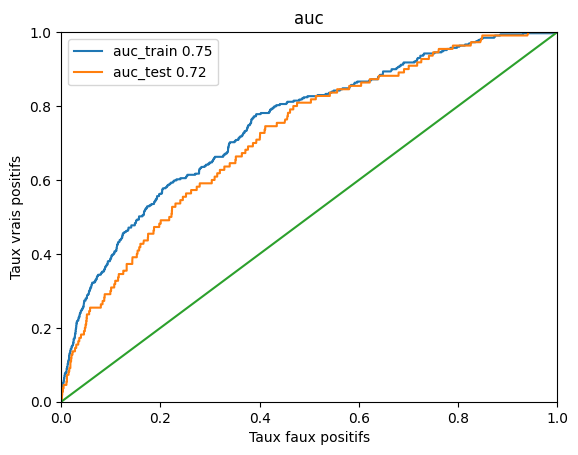

In [53]:
""" GRAPHIQUE AUC LOGISTIQUE"""
evaluation(logistic_final,x_train,x_test,y_train,y_test)

On remarque les défauts n'ont pas été reporté dans la matrice de confusion. Tout dépend du seuil de probabilité choisi pour déterminer l'appartenance ou non à la classe 1. 

In [54]:
get_coeff_for_model(logistic_final,x_train)

,index,coef
33,CODTYP_CRT_TRAVAIL_CRI_1,0.291814
34,CODTYP_CRT_TRAVAIL_CRI_2,0.148500
31,COD_CPPOP_CRI_1,0.439440
32,COD_CPPOP_CRI_2,0.155541
29,COD_SITU_LOGT_CRI_2,0.030197
30,COD_SITU_LOGT_CRI_3,0.133242
28,COD_TYPE_MARCHE_CRI_1,0.229296
27,IND_PRIMO_ACCEDT_CRI_1,0.114176
25,IRPAR_USAGE_V12_MAX_1,0.213307
26,IRPAR_USAGE_V12_MAX_2,0.721515


#### Performance du modèle sur les autres échantillons: 

In [55]:
""" RAPPEL MODELE FINAL"""
params_for_logistic={'random_state':42 ,
'fit_intercept':True, 
'class_weight':'{1: 2}', 
'C':0.1,
'l1_ratio':0, 
'penalty':'l2', 
'solver':'lbfgs'}
logistic_final=LogisticRegression(**params_for_logistic)
final_model_logistic=fitting_model(logistic_final,x_train,y_train)

In [56]:
print("Performance du modèle sur la base OOT")
y_oot_pred = final_model_logistic.predict_proba(x_oot) 
y_oot_pred = pd.DataFrame(y_oot_pred).iloc[: , 1]
score_auc_oot = sklearn.metrics.roc_auc_score(y_oot, y_oot_pred)
print('AUC base oot :' ,score_auc_oot.round(2))

print("Performance du modèle sur la base test")
y_test_predict = final_model_logistic.predict_proba(df_test) 
y_test_predict = pd.DataFrame(y_test_predict).iloc[: , 1]
score_auc_test = sklearn.metrics.roc_auc_score(y_test, y_test_predict)
print('AUC base test :' ,score_auc_test.round(2))

Performance du modèle sur la base OOT
AUC base oot : 0.69
Performance du modèle sur la base test
AUC base test : 0.52


### Modélisation concurrente

In [58]:
from collections import Counter
counter = Counter(y_train)
estimate = counter[0] / counter[1] 
print('Estimate: %.3f' % estimate)

Estimate: 154.508


In [60]:
""" GRIDSEARCH CV XGBOOST"""
boost=xgb.XGBClassifier(objective="binary:logistic")

param_grid_xgb = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [estimate],
    "subsample": [0 ,0.8],
    "colsample_bytree": [0.5],
    "n_jobs":[-1],
}


param_grid_xgb_bis = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0,0.5, 1, 10],
    "scale_pos_weight": [estimate],
    "subsample": [0 ,0.8],
    "colsample_bytree": [0.5,0.7],
    "n_jobs":[-1],
    "min_child_weight":[1,10]    
}


gridsearchcv_for_model(boost,x_base_train,y_base_train,param_grid_xgb,False)

KeyboardInterrupt: 

In [59]:
params_for_xgb={'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 154.50759878419453,
 'subsample': 0.8}

other_version_xgb={'colsample_bytree':0.7,
 'gamma': 0,
 'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_weight': 1,
 'reg_lambda': 10,
 'scale_pos_weight': 154.50759878419453,
 'subsample': 0.8}   




### Modèle et performance

Modèle XGBoost 2: Ajout de paramètres supplémentaires dans le cv


array([[37696, 13137],
       [  103,   226]])

array([[12494,  4450],
       [   52,    58]])

AUC TRAIN : 0.78
AUC TEST : 0.7


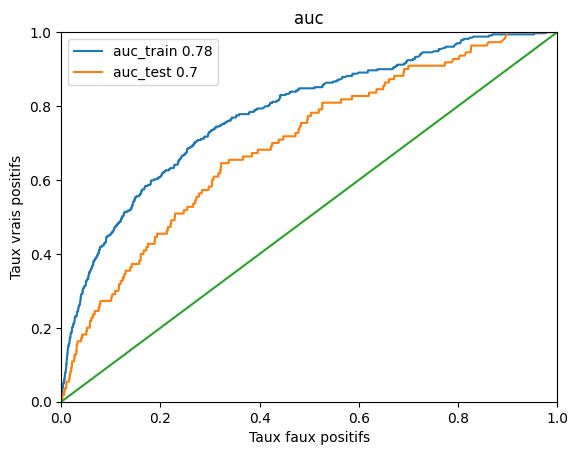

In [61]:
#print("Modèle XGBoost 1")
#xgb_model=xgb.XGBClassifier(**params_for_xgb)
#xgboost=fitting_model(xgb_model,x_train,y_train)
#evaluation(xgboost, x_train,x_test,y_train,y_test)
print("Modèle XGBoost 2: Ajout de paramètres supplémentaires dans le cv")
xgb_model_2=xgb.XGBClassifier(**other_version_xgb)
xgb_model_2=fitting_model(xgb_model_2,x_train,y_train)
evaluation(xgb_model_2, x_train,x_test,y_train,y_test)


In [62]:
""" Exportation du modèle et importation"""
#pickle.dump(xgboost, open('artefacts/xgboost.pkl', 'wb'))
# xgboost_model= pickle.load(open('artefacts/xgboost.pkl', 'rb'))


' Exportation du modèle et importation'

In [63]:

print("Performance du modèle sur la base OOT")
y_oot_pred = xgb_model_2.predict_proba(x_oot) 
y_oot_pred = pd.DataFrame(y_oot_pred).iloc[: , 1]
score_auc_oot = sklearn.metrics.roc_auc_score(y_oot, y_oot_pred)
print('AUC base oot :' ,score_auc_oot.round(2))



Performance du modèle sur la base OOT
AUC base oot : 0.68


### Interprétation du modèle

In [65]:
xgb_model=xgb_model_2

In [66]:

shap.initjs()
explain_xgb= shap.TreeExplainer(xgb_model)
shap_values = explain_xgb.shap_values(x_train)
shap.force_plot(explain_xgb.expected_value, shap_values[2, :], x_train.iloc[2, :])

In [67]:
shap_values = explain_xgb.shap_values(x_train)
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_train.columns,vals)),columns=['col_name','feature_importance_vals'])


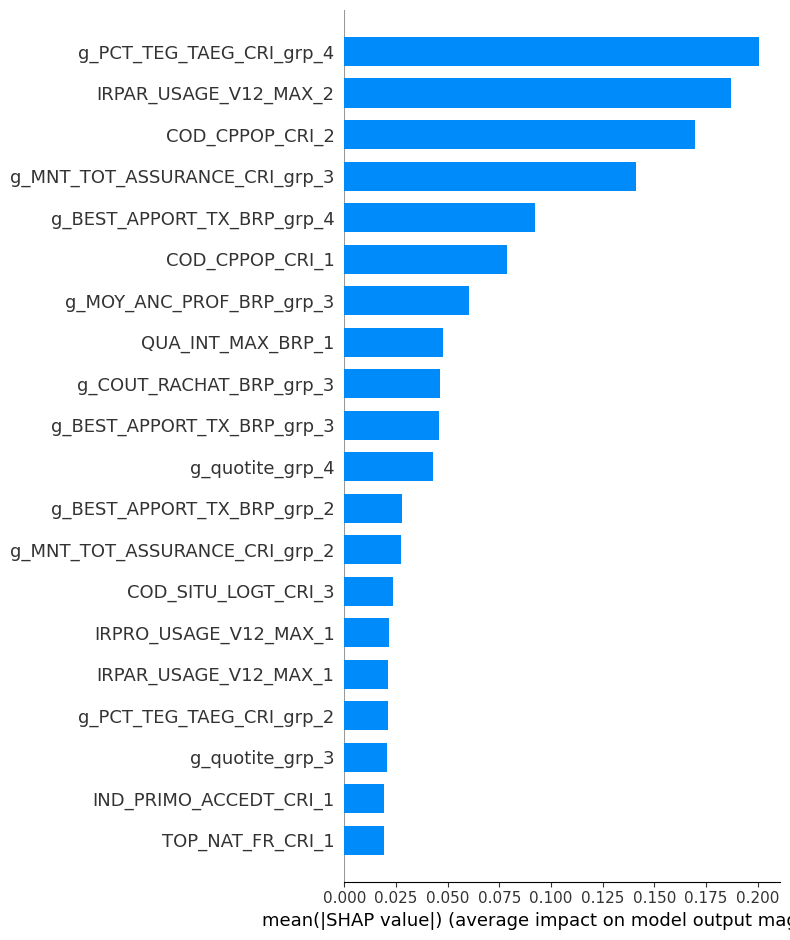

In [68]:
shap.summary_plot(shap_values, x_base_train,plot_type="bar")

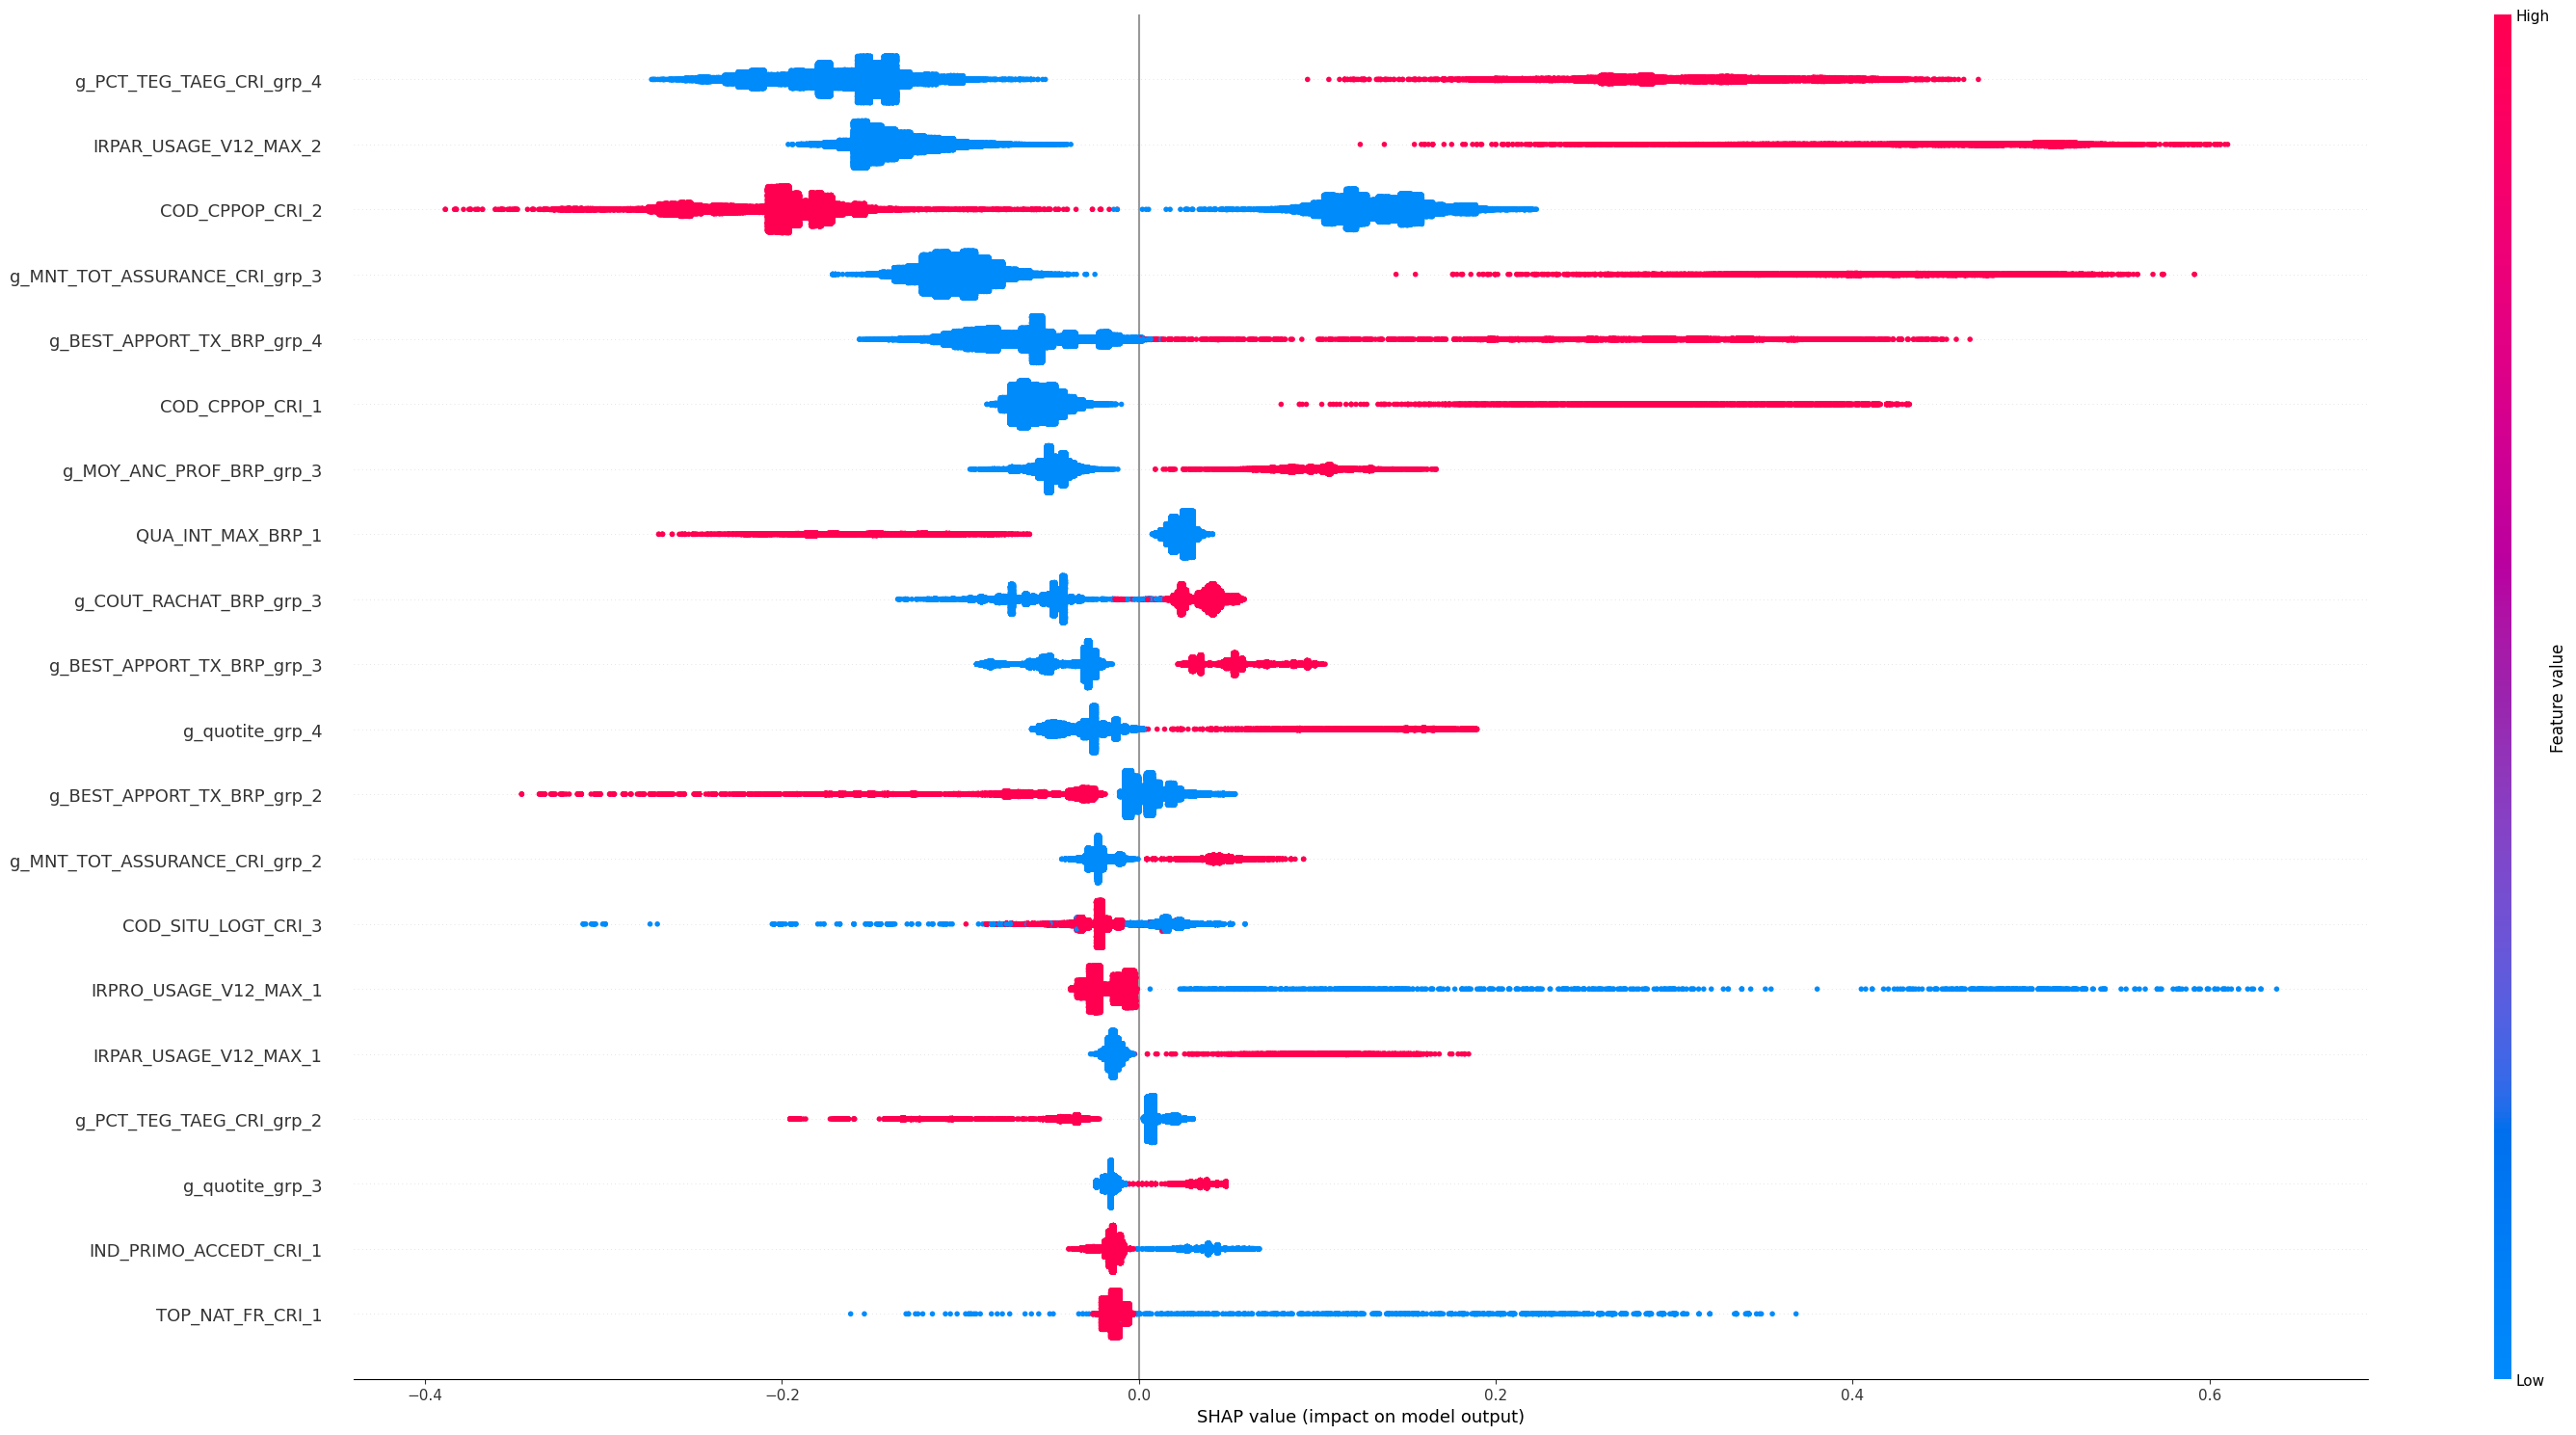

In [69]:
""" Contributions de toutes les variables"""

shap.summary_plot(shap_values, #Use Shap values array
                             features=x_train, # Use training set features
                             feature_names=x_train.columns, #Use column names
                             show=False, #Set to false to output to folder
                             plot_size=(30,15)) # Change plot size


Sur le premier graphique, l'importance des variables est exprimée en valeur absolue des valeur de Shap, ce qui permet d'apprécier l'importance dans son ensemble de chacune des valeurs. Parmi les variables qui ont le plus d'importance, que ce soit positivement ou négativement, on trouve le fait d'appartenir à:
- classe 4 de taux de PCT_TEG_TAEG_CRI
-  classe de risque 2 de IRPAR_USAGE_V12_MAX
- classe 2 de COD_CPPOP_CRI
- classe 3 de MTN_TOT_ASSURANCE_CRI

Sur le second graphique, les valeurs de Shap sont présentées par leur ordre d'importance également. De plus, chaque point, soit chaque observation, est présentée dans un 'continuum' de valeur de Shap. Les points rouges sont les valeurs élevées, les bleues les valeurs faibles de cette même variable. Remarque;la cohérence des couleurs n'est pas évidente à interpréter car il n'y a pas de valeurs élevées/faibles pour une modalité. Toutefois, on peut quand même apprécier ce graphique pour nuancer l'importance de la variable explicative: parmi les individus appartenant à une même modalité, on peut voir que la contribution d'une variable, comme  COD_CPPOP_CRI classe 2, peut avoir un effet ambigu sur la prédiction du risque de défaut. En effet, cela peut en grande majorité (concentration sur la gauche) avoir influencer négativement le comportement de non-défaut (c'est-à-dire influencer positivement le comportement de défaut ).

